# Import Library

In [1]:
import gymnasium as gym
import numpy as np
import torch

c:\Users\choho\RL_project\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Parameters and environment

In [2]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
if torch.backends.cudnn.enabled:
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

epsilon = 0.0005
batch_size = 32  
update_frequency = 150
nframes = 2000 
memory = 1500



# environment
# We use CartPole-v1 from OPENAI Gymnasium's repository
environment = gym.make("CartPole-v1", max_episode_steps=200, render_mode="rgb_array")

###  Function for training and testing each extension and rainbow

In [3]:
from utils.DQN import DQNAgent  

def train_and_test_agent(Agent,environment, memory, batch_size, update_frequency, num_frames, video_folder, epsilon=None, seed=42):
    """
    Initializes, trains and tests a DQN agent on a specified environment.
    
    Args:
        Agent : The agent class to be used.
        environment: The environment on which the agent will be trained and tested.
        memory: The size of the repetition memory.
        batch_size: The batch size for sampling.
        update_frequency: Update frequency of the target network.
        num_frames: Number of frames for training.
        video_folder: Folder where to store the video of the test episode.
        epsilon: Epsilon decay rate. Pass None for noisy networks.
        seed: Random seed for reproducibility.
    """
    # Agent initialisation with or without epsilon based on agent type
    if epsilon is not None:
        agent = Agent(environment, memory, batch_size, update_frequency, epsilon, seed)
    else:
        # For Noisy Nets, where epsilon is not applied
        agent = Agent(environment, memory, batch_size, update_frequency, seed=seed)

    # Agent training
    scores, losses = agent.train(num_frames)

    # Test the agent and store an episode on video
    agent.test(video_folder=video_folder)
    return scores, losses

## DQN

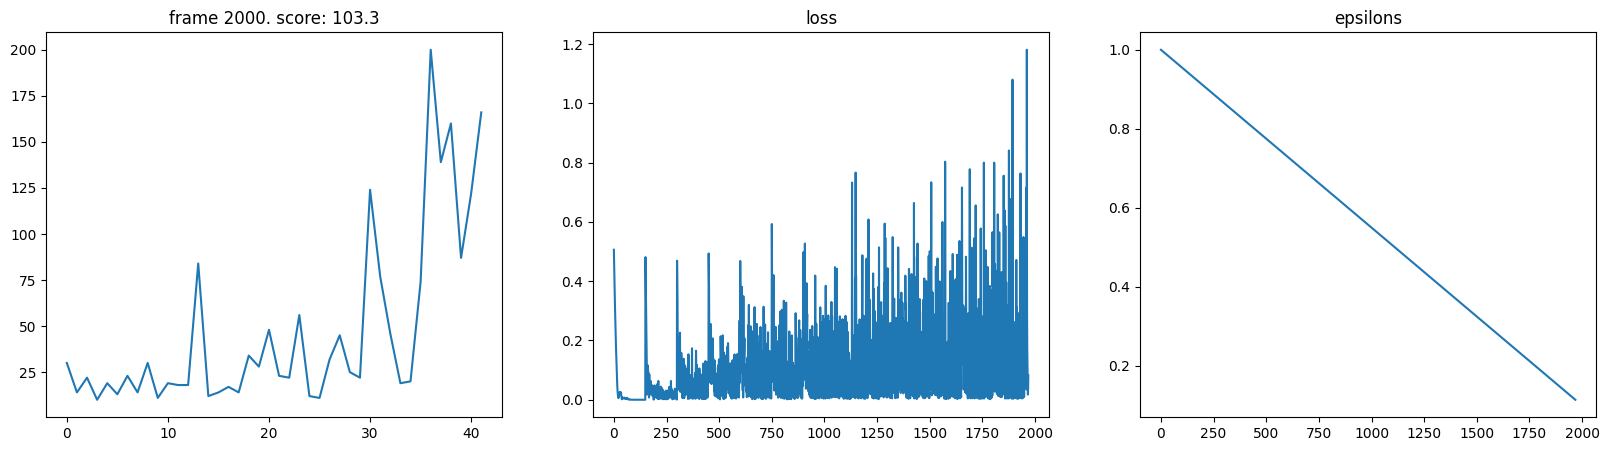

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\dqn folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4
score:  200.0


In [4]:
from utils.DQN import DQNAgent

# DQN
scores_dqn, losses_dqn = train_and_test_agent(DQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/dqn", epsilon=epsilon)


# DDQN

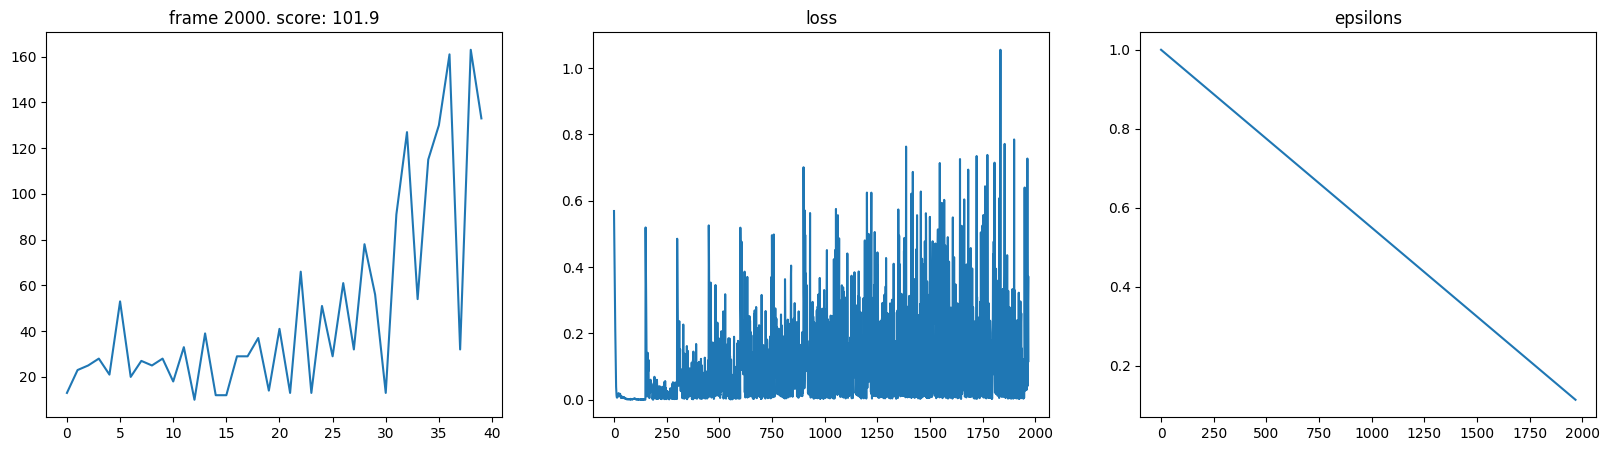

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\dqn folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4
score:  198.0


In [5]:
from utils.DDQN import DDQNAgent

scores_ddqn , losses_ddqn =train_and_test_agent(DDQNAgent,environment, memory, batch_size, update_frequency, nframes, "results/dqn", epsilon=epsilon)


# Prioritized DDQN

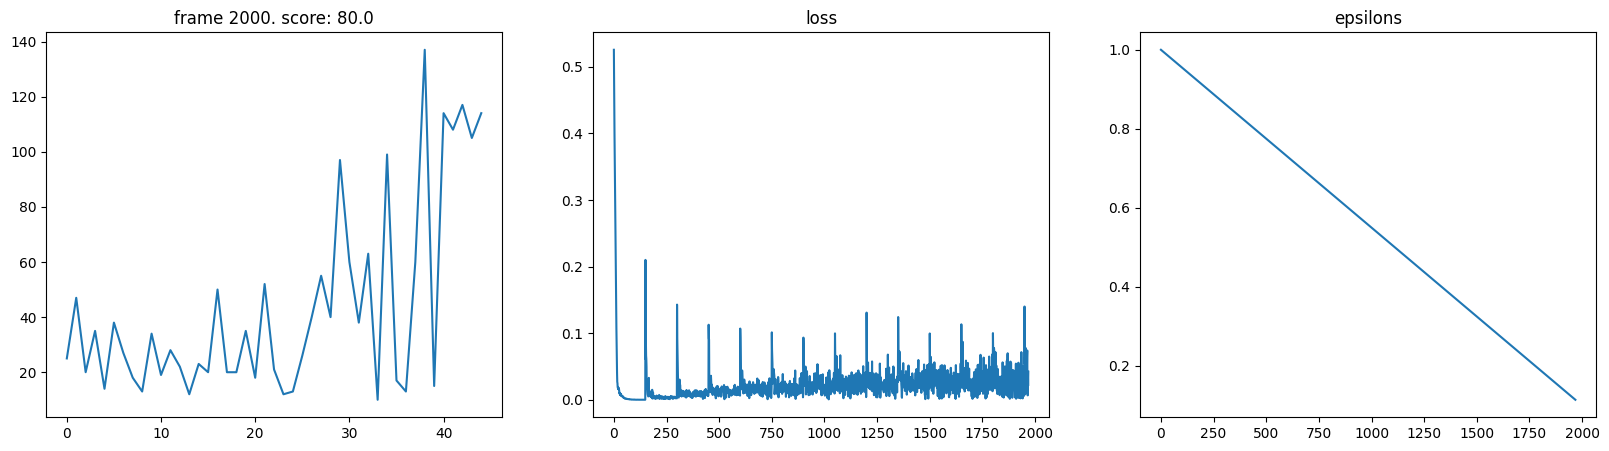

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\PER folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4
score:  90.0


In [6]:
from utils.PER import PERAgent

scores_per, losses_per =train_and_test_agent(PERAgent, environment, memory, batch_size, update_frequency, nframes, "results/PER", epsilon=epsilon)


# Dueling DDQN

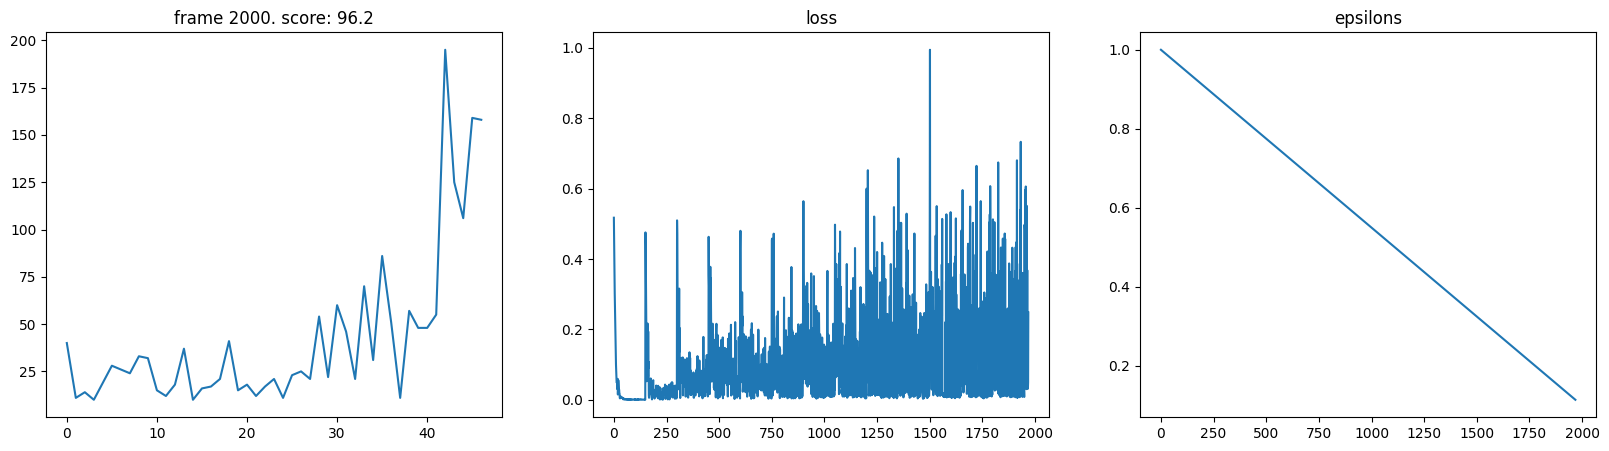

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\DUELLING folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4
score:  200.0


In [7]:
from utils.DUELLING import DUELLINGAgent

scores_duelling, losses_duelling =train_and_test_agent(DUELLINGAgent, environment, memory, batch_size, update_frequency, nframes, "results/DUELLING", epsilon=epsilon)


# Multi-step learning

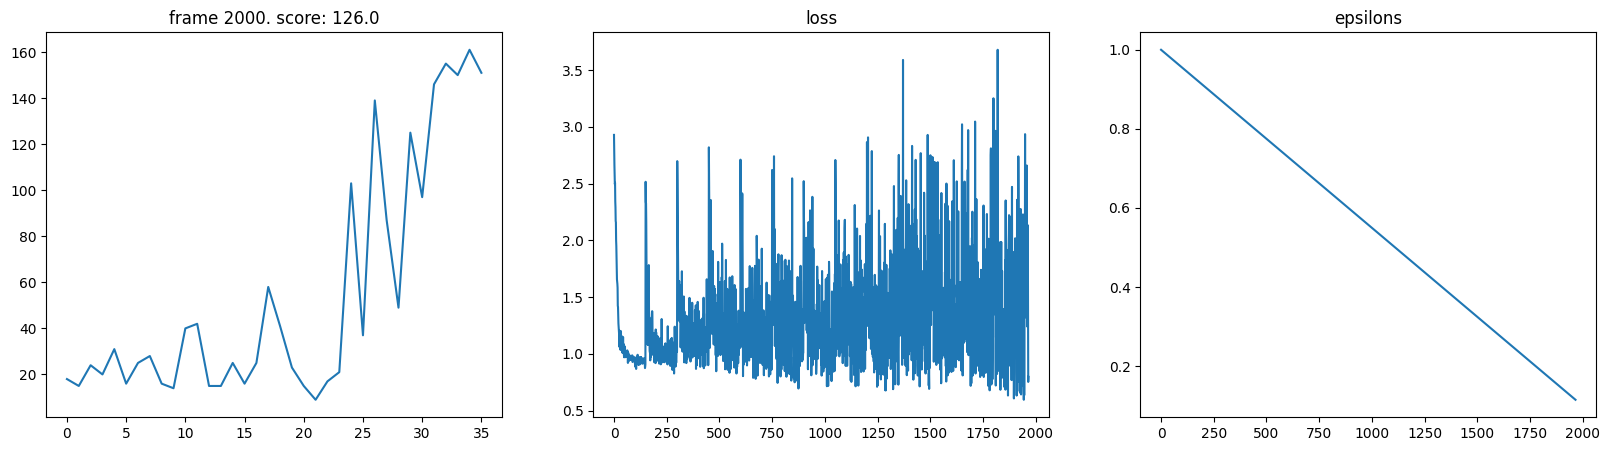

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\MULTISTEP folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4
score:  156.0


In [8]:
from utils.MULTISTEP import MULTISTEPAgent

scores_multi, losses_multi =train_and_test_agent(MULTISTEPAgent, environment, memory, batch_size, update_frequency, nframes, "results/MULTISTEP", epsilon=epsilon)


# Distributional DQN

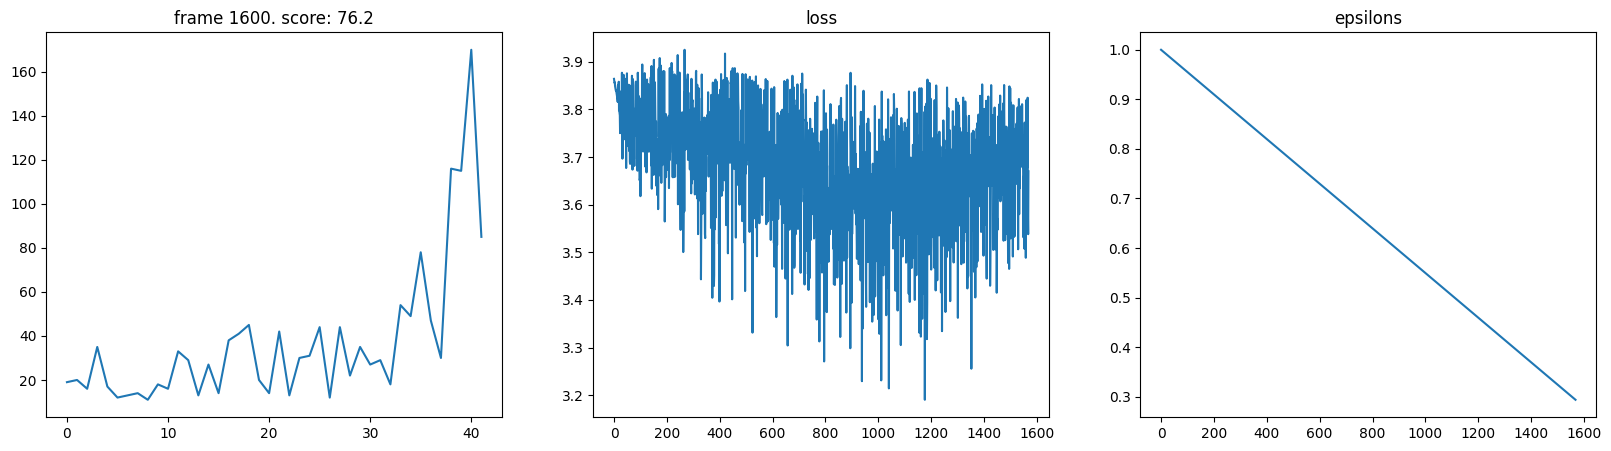

In [9]:
from utils.DISTRIBUTIONALDQN import DISTRIBUTIONALDQNAgent

scores_dist, losses_dist = train_and_test_agent(DISTRIBUTIONALDQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/DISTRIBUTIONALDQN", epsilon=epsilon)


# Noisy DQN


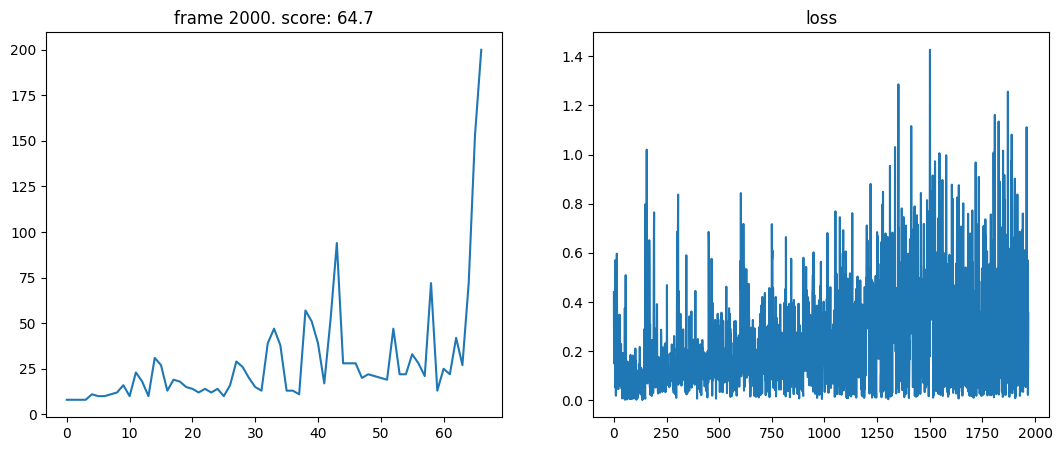

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\NOISYDQN folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4



Moviepy - Done !


Moviepy - video ready c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4
score:  75.0


In [ ]:
from utils.NOISYDQN import NOISYDQNAgent

scores_noisy, losses_noisy =train_and_test_agent(NOISYDQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/NOISYDQN", epsilon=None)



# Rainbow

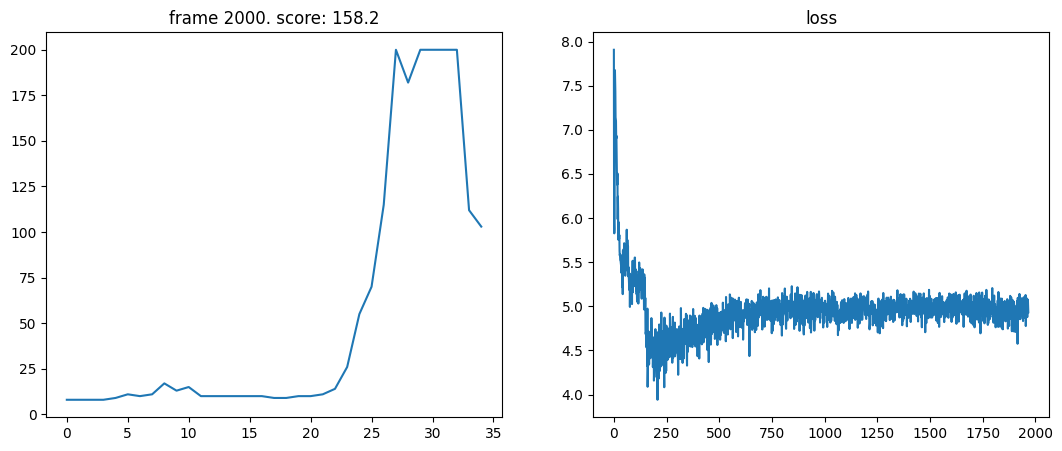

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\RAINBOW folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4
score:  189.0


In [ ]:
from utils.RAINBOW import RAINBOWAgent

scores_rainbow , losses_rainbow =train_and_test_agent(RAINBOWAgent, environment, memory, batch_size, update_frequency, nframes, "results/RAINBOW", epsilon=None)

# combined graph

NameError: name 'losses_dist' is not defined

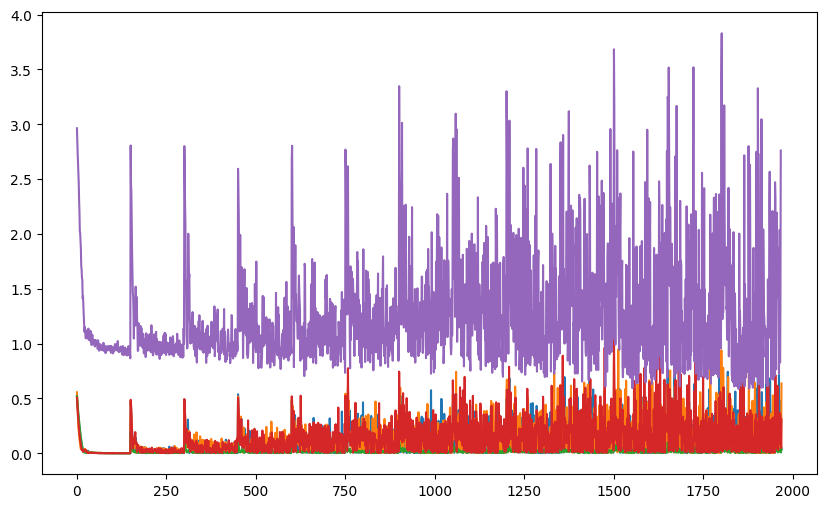

In [ ]:
import matplotlib.pyplot as plt

# Supposons que losses_dqn, losses_ddqn, etc., contiennent les pertes accumulées pendant l'entraînement
# pour chaque type d'agent respectivement.

# Création de la figure et de l'axe
plt.figure(figsize=(10, 6))

# Tracé de chaque courbe de perte
plt.plot(losses_dqn, label='DQN')
plt.plot(losses_ddqn, label='DDQN')
plt.plot(losses_per, label='Prioritized DDQN')
plt.plot(losses_duelling, label='Dueling DDQN')
plt.plot(losses_multi, label='Multi-step learning')
plt.plot(losses_dist, label='Distributional DQN')
plt.plot(losses_noisy, label='Noisy DQN')
plt.plot(losses_rainbow, label='Rainbow')

# Ajout de titres et de labels
plt.title('Comparison of Loss Curves for DQN Extensions')
plt.xlabel('Training Frames')
plt.ylabel('Loss')
plt.legend()

# Affichage du graphique
plt.show()


NameError: name 'scores_dist' is not defined

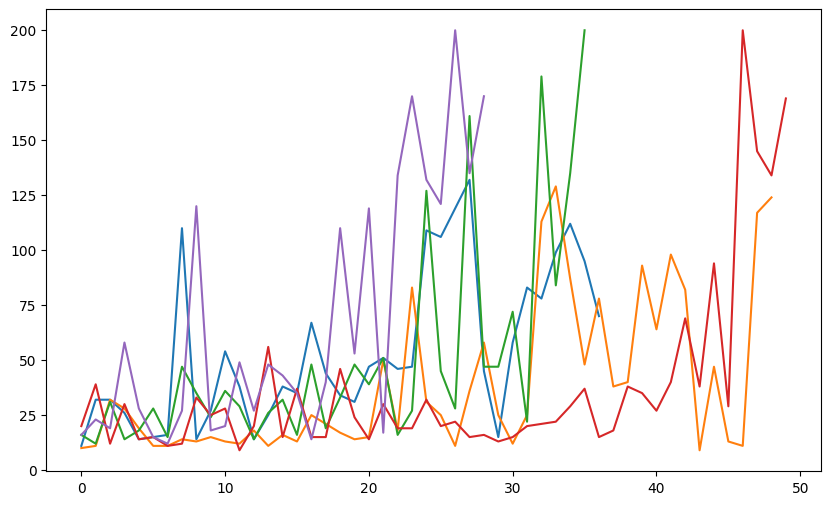

In [ ]:
import matplotlib.pyplot as plt

# Supposons que scores_dqn, scores_ddqn, etc., contiennent les scores accumulés pendant l'entraînement
# pour chaque type d'agent respectivement.

# Création de la figure et de l'axe
plt.figure(figsize=(10, 6))

# Tracé de chaque courbe de score
plt.plot(scores_dqn, label='DQN')
plt.plot(scores_ddqn, label='DDQN')
plt.plot(scores_per, label='Prioritized DDQN')
plt.plot(scores_duelling, label='Dueling DDQN')
plt.plot(scores_multi, label='Multi-step learning')
plt.plot(scores_dist, label='Distributional DQN')
plt.plot(scores_noisy, label='Noisy DQN')
plt.plot(scores_rainbow, label='Rainbow')

# Ajout de titres et de labels
plt.title('Comparison of Score Curves for DQN Extensions')
plt.xlabel('Training Frames')
plt.ylabel('Score')
plt.legend()

# Affichage du graphique
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Normalize the scores
scaler = MinMaxScaler()
normalized_scores_dqn = scaler.fit_transform(scores_dqn.reshape(-1, 1))
normalized_scores_ddqn = scaler.fit_transform(scores_ddqn.reshape(-1, 1))
normalized_scores_per = scaler.fit_transform(scores_per.reshape(-1, 1))
normalized_scores_duelling = scaler.fit_transform(scores_duelling.reshape(-1, 1))
normalized_scores_multi = scaler.fit_transform(scores_multi.reshape(-1, 1))
normalized_scores_dist = scaler.fit_transform(scores_dist.reshape(-1, 1))
normalized_scores_noisy = scaler.fit_transform(scores_noisy.reshape(-1, 1))
normalized_scores_rainbow = scaler.fit_transform(scores_rainbow.reshape(-1, 1))

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot each score curve
plt.plot(normalized_scores_dqn, label='DQN')
plt.plot(normalized_scores_ddqn, label='DDQN')
plt.plot(normalized_scores_per, label='Prioritized DDQN')
plt.plot(normalized_scores_duelling, label='Dueling DDQN')
plt.plot(normalized_scores_multi, label='Multi-step learning')
plt.plot(normalized_scores_dist, label='Distributional DQN')
plt.plot(normalized_scores_noisy, label='Noisy DQN')
plt.plot(normalized_scores_rainbow, label='Rainbow')

# Add titles and labels
plt.title('Comparison of Normalized Score Curves for DQN Extensions')
plt.xlabel('Training Frames')
plt.ylabel('Normalized Score')
plt.legend()

# Display the graph
plt.show()


ModuleNotFoundError: No module named 'sklearn'